<a href="https://colab.research.google.com/github/Paospina0718/Metodos-multivariados-2024-1/blob/main/Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 2
**Integrantes:**

Paola Andrea Ospina Sánchez. CC. 1007355141

Laura Alejandra Valbuena Gaona. CC. 1000061520

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import math
import statistics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import chi2_contingency

## 1. Describiendo datos

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Maestria/Semestre 1/Métodos multivariados/Taller2/punto1.xlsx')
data.head()

,Conjugados,Anisidina,Peróxidos
0,0.42,46.38,11.08
1,0.44,47.46,8.86
2,0.41,47.77,11.39
3,0.40,44.44,11.02
4,0.48,45.50,10.56


In [ ]:
des = data.describe()
median = pd.DataFrame({'median':data.median()}).T
cv = pd.DataFrame({'cv':(data.std()/data.mean())*100}).T
variance = pd.DataFrame({'variance':data.var()}).T
range = pd.DataFrame({'range':data.max()-data.min()}).T
int_range = pd.DataFrame({'int_range':data.quantile(0.75)-data.quantile(0.25)}).T
trunc_mean = pd.DataFrame({'trunc_mean':data.apply(lambda x: np.mean(x[(x >= np.percentile(x, 10)) & (x <= np.percentile(x, 90))]))}).T
winso_mean = pd.DataFrame({'winso_mean':data.apply(lambda x: np.mean(np.clip(x, np.percentile(x, 10), np.percentile(x, 90))))}).T
c_20 = pd.DataFrame({'20%':data.quantile(0.20)}).T
c_80 = pd.DataFrame({'80%':data.quantile(0.80)}).T
e_des = pd.concat([des,median,cv,variance,range,int_range,trunc_mean,
                   winso_mean,c_20,c_80],axis=0)
e_des

,Conjugados,Anisidina,Peróxidos
count,18.000000,18.000000,18.000000
mean,0.495000,41.446667,9.527222
std,0.185860,6.799785,2.823773
min,0.160000,26.400000,0.750000
25%,0.412500,40.412500,10.255000
50%,0.485000,44.535000,10.535000
75%,0.527500,45.407500,10.885000
max,0.830000,47.770000,11.860000
median,0.485000,44.535000,10.535000
cv,37.547572,16.406107,29.638992


### Matriz de covarianza

In [ ]:
data.cov()

,Conjugados,Anisidina,Peróxidos
Conjugados,0.034544,0.545041,0.322868
Anisidina,0.545041,46.237071,15.875802
Peróxidos,0.322868,15.875802,7.973692


### Matriz de correlación de Pearson

<Axes: >

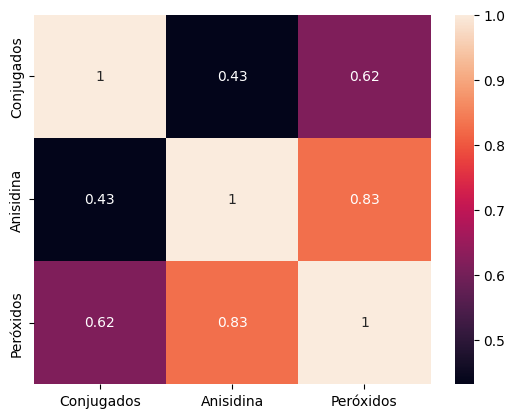

In [ ]:
pearson = data.corr(method='pearson')
sns.heatmap(pearson,annot=True)

### Matriz de correlación de Spearman

<Axes: >

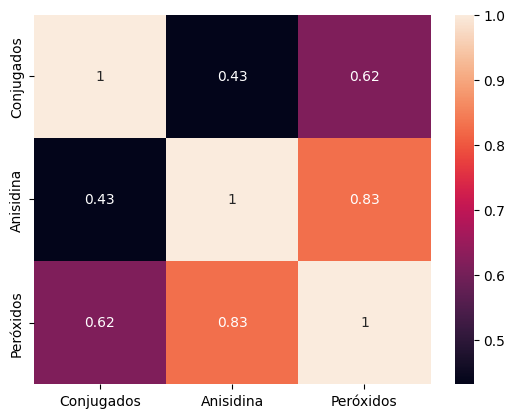

In [ ]:
spearman = data.corr(method='spearman')
sns.heatmap(pearson,annot=True)

### Patrón de dispersión

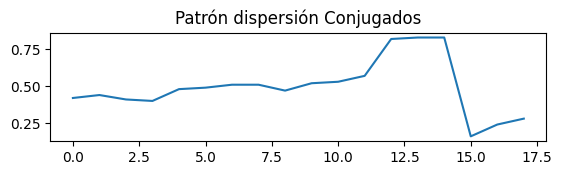

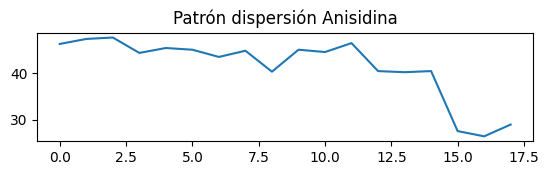

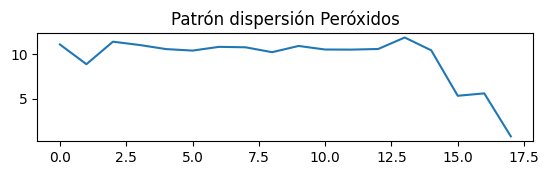

In [ ]:
for columnas,plot in zip(data.columns,[1,2,3]):
  plt.subplot(3,1,plot)
  plt.plot(data[columnas])
  plt.title(f'Patrón dispersión {columnas}')
  plt.show()

### Patrón de dispersión por pares

<Axes: xlabel='Conjugados', ylabel='Anisidina'>

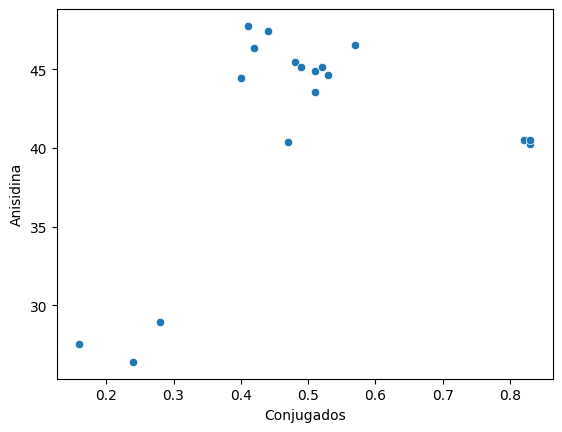

In [ ]:
sns.scatterplot(data, x='Conjugados',y='Anisidina')

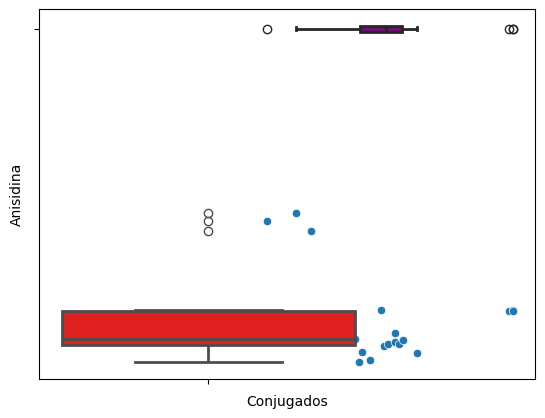

In [ ]:
sns.boxplot(x=data['Conjugados'], color='purple', linewidth=2)
sns.boxplot(y=data['Anisidina'], color='red', linewidth=2)
sns.scatterplot(data, x='Conjugados',y='Anisidina')

plt.show()

<Axes: xlabel='Conjugados', ylabel='Peróxidos'>

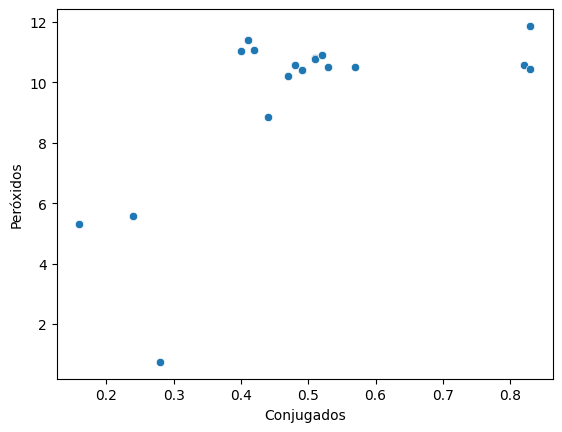

In [ ]:
sns.scatterplot(data, x='Conjugados',y='Peróxidos')

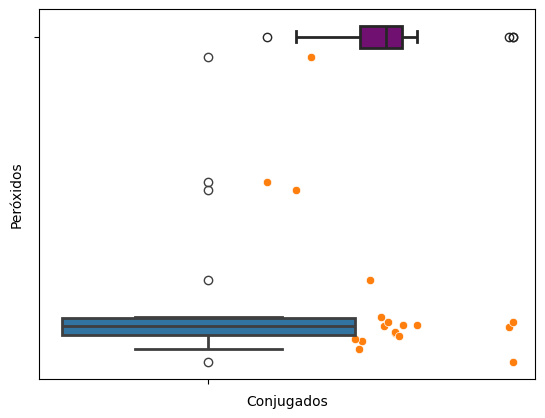

In [ ]:
sns.boxplot(x=data['Conjugados'], color='purple', linewidth=2)
sns.boxplot(y=data['Peróxidos'], linewidth=2)
sns.scatterplot(data, x='Conjugados',y='Peróxidos')

plt.show()

<Axes: xlabel='Anisidina', ylabel='Peróxidos'>

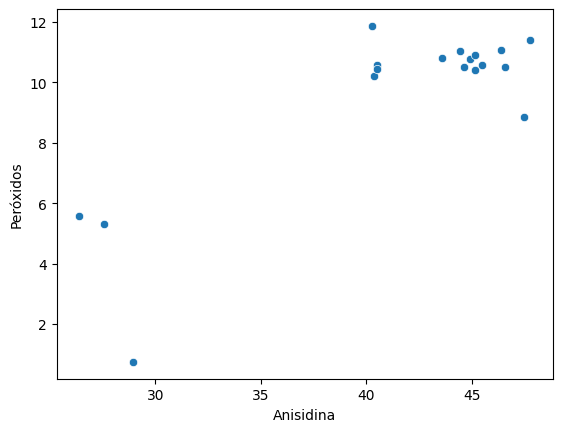

In [ ]:
sns.scatterplot(data, x='Anisidina',y='Peróxidos')

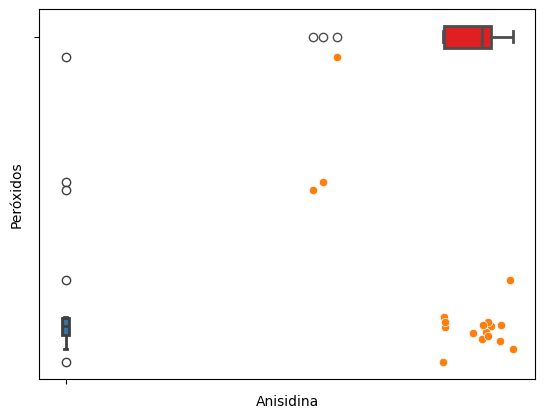

In [ ]:
sns.boxplot(x=data['Anisidina'], color='red', linewidth=2)
sns.boxplot(y=data['Peróxidos'], linewidth=2)
sns.scatterplot(data, x='Anisidina',y='Peróxidos')

plt.show()

### Boxplot

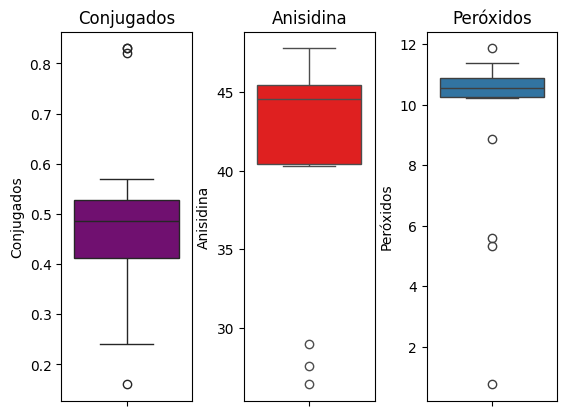

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(data['Conjugados'],color='purple')
plt.title('Conjugados')

plt.subplot(1,3,2)
sns.boxplot(data['Anisidina'],color='red')
plt.title('Anisidina')

plt.subplot(1,3,3)
sns.boxplot(data['Peróxidos'])
plt.title('Peróxidos')

plt.subplots_adjust(wspace=0.4)

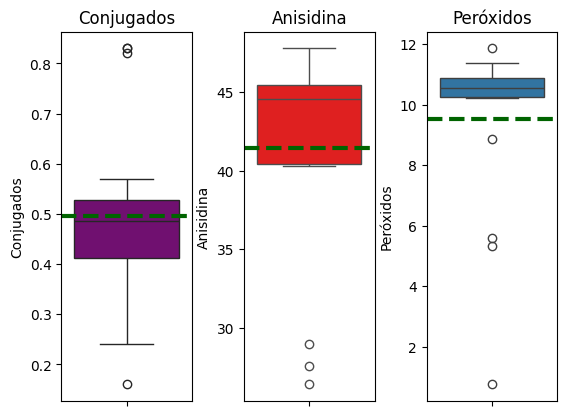

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(data['Conjugados'],color='purple')
plt.axhline(data['Conjugados'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Conjugados')

plt.subplot(1,3,2)
sns.boxplot(data['Anisidina'],color='red')
plt.axhline(data['Anisidina'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Anisidina')

plt.subplot(1,3,3)
sns.boxplot(data['Peróxidos'])
plt.axhline(data['Peróxidos'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Peróxidos')

plt.subplots_adjust(wspace=0.4)

### Diagrama violines

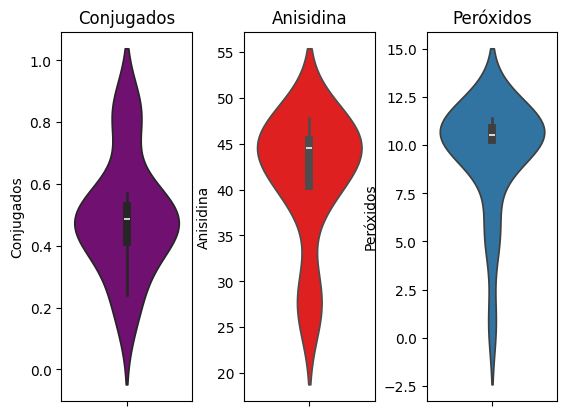

In [ ]:
plt.subplot(1,3,1)
sns.violinplot(data['Conjugados'],color='purple')
plt.title('Conjugados')

plt.subplot(1,3,2)
sns.violinplot(data['Anisidina'],color='red')
plt.title('Anisidina')

plt.subplot(1,3,3)
sns.violinplot(data['Peróxidos'])
plt.title('Peróxidos')

plt.subplots_adjust(wspace=0.4)

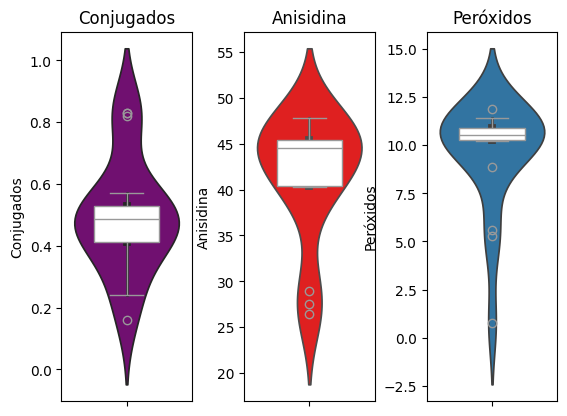

In [ ]:
plt.subplot(1, 3, 1)
sns.violinplot(data['Conjugados'], color='purple')
sns.boxplot(data['Conjugados'], color='white', width=0.5)
plt.title('Conjugados')

plt.subplot(1, 3, 2)
sns.violinplot(data['Anisidina'], color='red')
sns.boxplot(data['Anisidina'], color='white', width=0.5)
plt.title('Anisidina')

plt.subplot(1, 3, 3)
sns.violinplot(data['Peróxidos'])
sns.boxplot(data['Peróxidos'], color='white', width=0.5)
plt.title('Peróxidos')

plt.subplots_adjust(wspace=0.4)

### Histogramas

(0.0, 8.0)

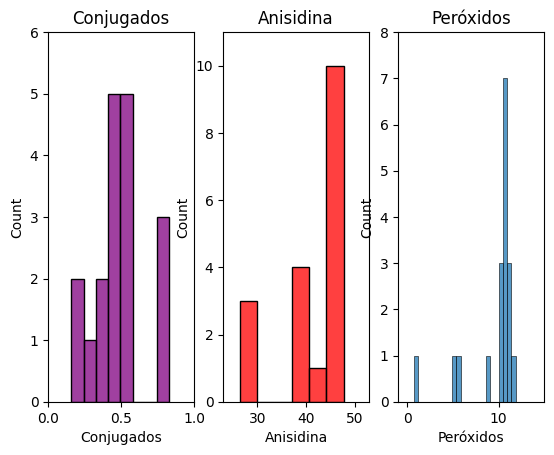

In [ ]:
plt.subplot(1,3,1)
sns.histplot(data['Conjugados'],color='purple')
plt.title('Conjugados')
plt.xlim(0,1)
plt.ylim(0,6)

plt.subplot(1,3,2)
sns.histplot(data['Anisidina'],color='red')
plt.title('Anisidina')
plt.xlim(23,53)
plt.ylim(0,11)

plt.subplot(1,3,3)
sns.histplot(data['Peróxidos'])
plt.title('Peróxidos')
plt.xlim(-1,15)
plt.ylim(0,8)


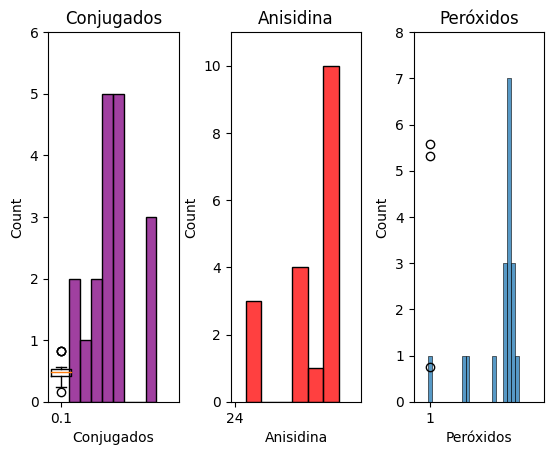

In [ ]:
plt.subplot(1, 3, 1)
sns.histplot(data['Conjugados'], color='purple')
plt.title('Conjugados')
plt.xlim(0, 1)
plt.ylim(0, 6)
plt.boxplot(data['Conjugados'], positions=[0.1])

plt.subplot(1, 3, 2)
sns.histplot(data['Anisidina'], color='red')
plt.title('Anisidina')
plt.xlim(23, 53)
plt.ylim(0, 11)
plt.boxplot(data['Anisidina'], positions=[24])

plt.subplot(1, 3, 3)
sns.histplot(data['Peróxidos'])
plt.title('Peróxidos')
plt.xlim(-1, 15)
plt.ylim(0, 8)
plt.boxplot(data['Peróxidos'], positions=[1])

plt.subplots_adjust(wspace=0.4)
plt.show()

### Diagrama de burbujas

In [ ]:
fig = px.scatter(data, x='Conjugados', y='Anisidina', size='Peróxidos', color='Peróxidos')
fig.update_layout(title='Diagrama de Burbujas',
                  xaxis_title='Conjugados',
                  yaxis_title='Anisidina')
fig.show()

In [ ]:
fig = px.scatter(data, x='Peróxidos', y='Anisidina', size='Conjugados', color='Conjugados')
fig.update_layout(title='Diagrama de Burbujas',
                  xaxis_title='Peróxidos',
                  yaxis_title='Anisidina')
fig.show()

In [ ]:
fig = px.scatter(data, x='Conjugados', y='Peróxidos', size='Anisidina', color='Anisidina')
fig.update_layout(title='Diagrama de Burbujas',
                  xaxis_title='Conjugados',
                  yaxis_title='Peróxidos')
fig.show()

### Gráfico 3D

Text(0.5, 0, 'Peróxidos')

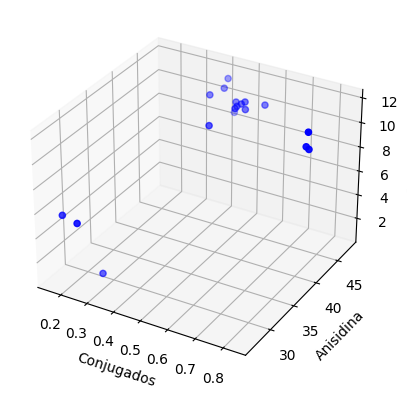

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Conjugados'], data['Anisidina'], data['Peróxidos'], c='b', marker='o')

ax.set_xlabel('Conjugados')
ax.set_ylabel('Anisidina')
ax.set_zlabel('Peróxidos')

### Estandarización zscore

In [ ]:
data_est = zscore(data)
data_est.head()

,Conjugados,Anisidina,Peróxidos
0,-0.415227,0.746547,0.565837
1,-0.304500,0.909980,-0.243138
2,-0.470591,0.956892,0.678802
3,-0.525955,0.452972,0.543973
4,-0.083045,0.613379,0.376347


Text(0.5, 1.0, 'Pearson zscore')

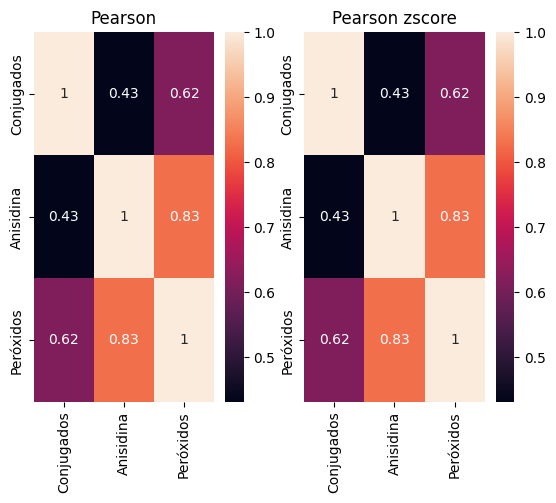

In [ ]:
plt.subplot(1,2,1)
sns.heatmap(pearson,annot=True)
plt.title('Pearson')

plt.subplot(1,2,2)
pearson_e = data_est.corr(method='pearson')
sns.heatmap(pearson_e,annot=True)
plt.title('Pearson zscore')

### Estandarización min max

In [ ]:
data_estm = MinMaxScaler().fit_transform(data)
data_estm = pd.DataFrame(data_estm)
data_estm.columns = data.columns
data_estm.head()

,Conjugados,Anisidina,Peróxidos
0,0.388060,0.934956,0.929793
1,0.417910,0.985494,0.729973
2,0.373134,1.000000,0.957696
3,0.358209,0.844174,0.924392
4,0.477612,0.893776,0.882988


Text(0.5, 1.0, 'Spearman min max')

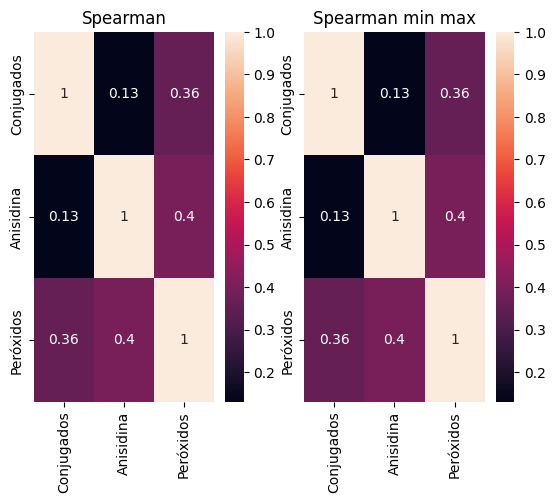

In [ ]:
plt.subplot(1,2,1)
sns.heatmap(spearman,annot=True)
plt.title('Spearman')

plt.subplot(1,2,2)
spearman_em = data_estm.corr(method='spearman')
sns.heatmap(spearman_em,annot=True)
plt.title('Spearman min max')

### Estandarización logaritmo natural

In [ ]:
data_estl = pd.DataFrame()

for col in data.columns:
    data_estl[f'{col}'] = data[col].apply(lambda x: math.log10(x) if x > 0 else 0)

data_estl.head()

,Conjugados,Anisidina,Peróxidos
0,-0.376751,1.666331,1.044540
1,-0.356547,1.676328,0.947434
2,-0.387216,1.679155,1.056524
3,-0.397940,1.647774,1.042182
4,-0.318759,1.658011,1.023664


In [ ]:
def estadisticas(data):
  des = data.describe()
  median = pd.DataFrame({'median':data.median()}).T
  cv = pd.DataFrame({'cv':(data.std()/data.mean())*100}).T
  variance = pd.DataFrame({'variance':data.var()}).T
  range = pd.DataFrame({'range':data.max()-data.min()}).T
  int_range = pd.DataFrame({'int_range':data.quantile(0.75)-data.quantile(0.25)}).T
  trunc_mean = pd.DataFrame({'trunc_mean':data.apply(lambda x: np.mean(x[(x >= np.percentile(x, 10)) & (x <= np.percentile(x, 90))]))}).T
  winso_mean = pd.DataFrame({'winso_mean':data.apply(lambda x: np.mean(np.clip(x, np.percentile(x, 10), np.percentile(x, 90))))}).T
  c_20 = pd.DataFrame({'20%':data.quantile(0.20)}).T
  c_80 = pd.DataFrame({'80%':data.quantile(0.80)}).T
  e_des = pd.concat([des,median,cv,variance,range,int_range,trunc_mean,
                   winso_mean,c_20,c_80],axis=0)
  return(e_des)

In [ ]:
Est_tot = pd.concat([e_des,estadisticas(data_est),estadisticas(data_estm),estadisticas(data_estl)],axis=1)
Est_tot.columns = ['Conjugados', 'Anisidina', 'Peróxidos',
                   'Conjugados_zscore', 'Anisidina_zscore', 'Peróxidos_zscore',
                   'Conjugados_minmax', 'Anisidina_minmax', 'Peróxidos_minmax',
                   'Conjugados_log', 'Anisidina_log', 'Peróxidos_log']
Est_tot

,Conjugados,Anisidina,Peróxidos,Conjugados_zscore,Anisidina_zscore,Peróxidos_zscore,Conjugados_minmax,Anisidina_minmax,Peróxidos_minmax,Conjugados_log,Anisidina_log,Peróxidos_log
count,18.000000,18.000000,18.000000,1.800000e+01,1.800000e+01,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.495000,41.446667,9.527222,6.414622e-16,2.960595e-16,-8.881784e-16,0.500000,0.704102,0.790029,-0.337787,1.610844,0.930503
std,0.185860,6.799785,2.823773,1.028992e+00,1.028992e+00,1.028992e+00,0.277404,0.318193,0.254165,0.181447,0.081916,0.280739
min,0.160000,26.400000,0.750000,-1.854682e+00,-2.276968e+00,-3.198447e+00,0.000000,0.000000,0.000000,-0.795880,1.421604,-0.124939
25%,0.412500,40.412500,10.255000,-4.567501e-01,-1.564974e-01,2.652045e-01,0.376866,0.655709,0.855536,-0.384600,1.606515,1.010923
50%,0.485000,44.535000,10.535000,-5.536365e-02,4.673484e-01,3.672374e-01,0.485075,0.848620,0.880738,-0.314281,1.648700,1.022633
75%,0.527500,45.407500,10.885000,1.799319e-01,5.993813e-01,4.947784e-01,0.548507,0.889448,0.912241,-0.277792,1.657125,1.036825
max,0.830000,47.770000,11.860000,1.854682e+00,9.568915e-01,8.500715e-01,1.000000,1.000000,1.000000,-0.080922,1.679155,1.074085
median,0.485000,44.535000,10.535000,-5.536365e-02,4.673484e-01,3.672374e-01,0.485075,0.848620,0.880738,-0.314281,1.648700,1.022633
cv,37.547572,16.406107,29.638992,1.604134e+17,3.475624e+17,-1.158541e+17,55.480740,45.191302,32.171598,-53.716441,5.085295,30.170688


Las estandarizaciones son una forma de transformación de los datos para escalar los datos y que estos se encuentren en un mismo rango. Con respecto a las correlaciones se observa que estas no varian. Sin embargo, al cambiar los valores originales, las estadísticas si son diferentes, especialmente en aquellos datos con mayor escala, como Anisidina y Peróxidos

#### Valores de referencia

In [ ]:
val_ref = pd.DataFrame(data.quantile(0.25)).T.reset_index(drop=True)
val_ref

,Conjugados,Anisidina,Peróxidos
0,0.4125,40.4125,10.255


 #### Coeficientes de variación


En maní crudo los dienos conjugados presentan un valor de 0.38, el peróxido es de 1.1 meqO2/Kg y la anisidina 81

In [5]:
datos_originales = np.array([[0.38, 1.1, 81],
                             [0.4125, 10.255, 40.4125]])

df = pd.DataFrame(datos_originales, columns=['Dienos conjugados', 'Peroxido', 'Anisidina'])
df

,Dienos conjugados,Peroxido,Anisidina
0,0.3800,1.100,81.0000
1,0.4125,10.255,40.4125


In [7]:
# Coeficientes de variación univariados
cv_univariados = df.std() / df.mean()
cv_univariados

Dienos conjugados    0.057996
Peroxido             1.140214
Anisidina            0.472763
dtype: float64

In [9]:
# Matriz de correlación
correlation_matrix = df.corr()
correlation_matrix

,Dienos conjugados,Peroxido,Anisidina
Dienos conjugados,1.0,1.0,-1.0
Peroxido,1.0,1.0,-1.0
Anisidina,-1.0,-1.0,1.0


In [12]:
# Coeficientes de variación multivariados
cv_multivariado = np.sqrt(np.sum(np.square(np.diag(np.linalg.pinv(correlation_matrix)))))
cv_multivariado

0.1924500897298751

In [13]:
# Método estándar (z-score)
scaler = StandardScaler()
datos_estandarizados_standard = scaler.fit_transform(df)

1.7320508075688772

In [14]:
# Coeficientes de variación univariados estandarizados (método estándar)
cv_univariados_estandarizados_standard = np.std(datos_estandarizados_standard, axis=0)
cv_univariados_estandarizados_standard

array([1., 1., 1.])

In [15]:
# Coeficiente de variación multivariado estandarizado (método estándar)
cv_multivariado_estandarizado_standard = np.sqrt(np.sum(np.square(cv_univariados_estandarizados_standard)))
cv_multivariado_estandarizado_standard

1.7320508075688772

In [16]:
# Método Min-Max
scaler_minmax = MinMaxScaler()
datos_estandarizados_minmax = scaler_minmax.fit_transform(df)

In [17]:
# Coeficientes de variación univariados estandarizados (método Min-Max)
cv_univariados_estandarizados_minmax = np.std(datos_estandarizados_minmax, axis=0)
cv_univariados_estandarizados_minmax

array([0.5, 0.5, 0.5])

In [18]:
# Coeficiente de variación multivariado estandarizado (método Min-Max)
cv_multivariado_estandarizado_minmax = np.sqrt(np.sum(np.square(cv_univariados_estandarizados_minmax)))
cv_multivariado_estandarizado_minmax

0.8660254037844386

In [19]:
# Error estándar de la media para cada variable
error_estandar_media = df.sem()
error_estandar_media

Dienos conjugados     0.01625
Peroxido              4.57750
Anisidina            20.29375
dtype: float64

#### Simulaciones Montecarlo

In [ ]:
np.random.seed(1007355141)

MC = pd.DataFrame()
medias = data.mean()
desviaciones = data.std()

for col in data.columns:
    media = medias[col]
    desviacion = desviaciones[col]
    datos_simulados = np.random.normal(loc=media, scale=desviacion, size=500)
    MC[col] = datos_simulados

MC

,Conjugados,Anisidina,Peróxidos
0,0.452995,42.457801,2.521669
1,0.784798,42.190177,9.871359
2,0.343533,41.637375,15.404163
3,0.798982,39.024286,9.195996
4,0.157562,41.430529,9.893412
...,...,...,...
495,0.512300,40.676989,10.531835
496,0.522705,28.823352,8.947566
497,0.698220,48.253934,5.612848
498,0.599444,48.977941,11.905322


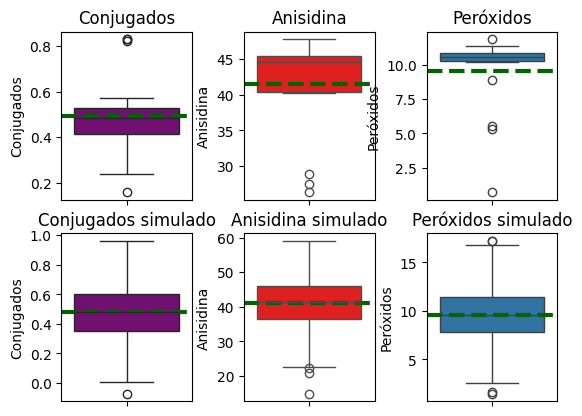

In [ ]:
plt.subplot(2,3,1)
sns.boxplot(data['Conjugados'],color='purple')
plt.axhline(data['Conjugados'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Conjugados')

plt.subplot(2,3,2)
sns.boxplot(data['Anisidina'],color='red')
plt.axhline(data['Anisidina'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Anisidina')

plt.subplot(2,3,3)
sns.boxplot(data['Peróxidos'])
plt.axhline(data['Peróxidos'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Peróxidos')

plt.subplot(2,3,4)
sns.boxplot(MC['Conjugados'],color='purple')
plt.axhline(MC['Conjugados'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Conjugados simulado')

plt.subplot(2,3,5)
sns.boxplot(MC['Anisidina'],color='red')
plt.axhline(MC['Anisidina'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Anisidina simulado')

plt.subplot(2,3,6)
sns.boxplot(MC['Peróxidos'])
plt.axhline(MC['Peróxidos'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Peróxidos simulado')

plt.subplots_adjust(wspace=0.4)

Los datos con la simulación tienen la misma media, son menos variables que los datos originales

#### Bootstrap

In [ ]:
np.random.seed(1000061520)

bootstrap = MC.sample(n=len(MC))
bootstrap

,Conjugados,Anisidina,Peróxidos
483,0.176105,53.197647,13.182145
379,0.456505,39.146722,12.292855
206,0.582788,48.875125,9.240512
281,0.756470,37.023137,6.487914
179,0.550585,35.839737,9.066894
...,...,...,...
389,0.856499,48.378175,13.456831
425,0.390408,38.511358,7.223814
334,0.274982,50.025564,4.253732
295,0.857021,36.986605,9.453777


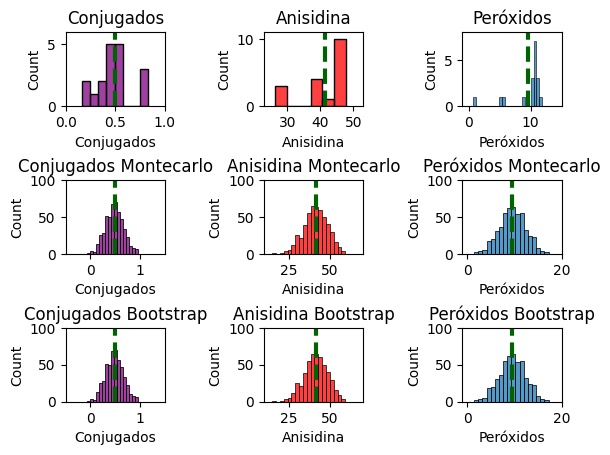

In [ ]:
plt.subplot(3,3,1)
sns.histplot(data['Conjugados'],color='purple')
plt.axvline(data['Conjugados'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Conjugados')
plt.xlim(0,1)
plt.ylim(0,6)

plt.subplot(3,3,2)
sns.histplot(data['Anisidina'],color='red')
plt.axvline(data['Anisidina'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Anisidina')
plt.xlim(23,53)
plt.ylim(0,11)

plt.subplot(3,3,3)
sns.histplot(data['Peróxidos'])
plt.axvline(data['Peróxidos'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Peróxidos')
plt.xlim(-1,15)
plt.ylim(0,8)

plt.subplot(3,3,4)
sns.histplot(MC['Conjugados'],color='purple')
plt.axvline(data['Conjugados'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Conjugados Montecarlo')
plt.xlim(-0.5,1.5)
plt.ylim(0,100)

plt.subplot(3,3,5)
sns.histplot(MC['Anisidina'],color='red')
plt.axvline(data['Anisidina'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Anisidina Montecarlo')
plt.xlim(10,70)
plt.ylim(0,100)

plt.subplot(3,3,6)
sns.histplot(MC['Peróxidos'])
plt.axvline(data['Peróxidos'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Peróxidos Montecarlo')
plt.xlim(-1,20)
plt.ylim(0,100)

plt.subplot(3,3,7)
sns.histplot(bootstrap['Conjugados'],color='purple')
plt.axvline(data['Conjugados'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Conjugados Bootstrap')
plt.xlim(-0.5,1.5)
plt.ylim(0,100)

plt.subplot(3,3,8)
sns.histplot(bootstrap['Anisidina'],color='red')
plt.axvline(data['Anisidina'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Anisidina Bootstrap')
plt.xlim(10,70)
plt.ylim(0,100)

plt.subplot(3,3,9)
sns.histplot(bootstrap['Peróxidos'])
plt.axvline(data['Peróxidos'].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
plt.title('Peróxidos Bootstrap')
plt.xlim(-1,20)
plt.ylim(0,100)

plt.subplots_adjust(wspace=1,hspace=1)

# Busque en la literatura los valores de referencia que podrían tener estar variables en una condición o producto alimenticio sin aplicar tratamiento alguno y compare estos valores de referencia con los obtenidos para sus datos en bruto.
Con los coeficientes de variación univariados, calcule el coeficiente de variación multivariado tal como vimos en clase.
Estandarice los datos por cualquier método y genere los coeficientes de variación univariados y el multivariado y compare los resultados con la forma no estandarizada.

### 80% del bootstrap

In [ ]:
np.random.seed(1007355141)

bootstrap_80 = bootstrap.sample(n=400)
bootstrap_80

,Conjugados,Anisidina,Peróxidos
372,0.405471,49.362986,8.352929
210,0.627867,37.035797,15.194328
134,0.319652,27.749159,5.022263
69,0.725734,38.868404,8.934155
86,0.504921,41.041459,9.661930
...,...,...,...
396,0.682187,42.108161,6.780742
5,0.567130,37.289197,5.137268
37,0.635860,48.183740,9.151805
103,0.295246,43.345101,2.777856


In [ ]:
ded = pd.DataFrame({'Data_original':data.std()}).T
dwb = pd.DataFrame({'Data_bootstrap':bootstrap_80.std()}).T
pd.concat([ded,dwb],axis=0) ###PREGUNTAR COMO SE COMPARAN

,Conjugados,Anisidina,Peróxidos
Data_original,0.18586,6.799785,2.823773
Data_bootstrap,0.18097,7.262733,2.785821


## 2. Textura alimentos

In [ ]:
tex = pd.read_excel(('/content/drive/MyDrive/Maestria/Semestre 1/Métodos multivariados/Taller2/Punto2.xlsx'),skiprows=1)
tex.columns = ['H1','S1','C1','G1','Ch1','H7','S7','C7','G7','Ch7']
tex

,H1,S1,C1,G1,Ch1,H7,S7,C7,G7,Ch7
0,9.79,0.76,0.53,534.26,414.81,9.09,0.67,0.60,496.39,339.58
1,9.04,0.71,0.47,429.66,301.59,9.49,0.74,0.49,523.89,385.61
2,9.12,0.72,0.47,416.49,156.83,9.62,0.59,0.42,198.19,117.04
3,4.54,0.69,0.46,120.25,82.99,6.51,0.71,0.44,292.80,205.78
4,4.15,0.72,0.48,201.26,144.42,6.31,0.69,0.45,287.57,199.92
5,4.31,0.71,0.41,176.99,126.16,5.37,0.64,0.41,227.10,146.66
6,3.61,0.65,0.44,71.44,45.23,4.11,0.62,0.41,173.31,106.79
7,3.21,0.59,0.46,240.82,140.72,5.26,0.68,0.42,265.31,180.85
8,3.77,0.71,0.40,123.47,88.14,4.62,0.68,0.45,162.47,110.04
9,3.30,0.78,0.57,188.54,148.22,3.52,0.61,0.69,454.12,341.09


In [ ]:
estadisticas(tex)

,H1,S1,C1,G1,Ch1,H7,S7,C7,G7,Ch7
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,4.602000,0.678000,0.475333,213.898000,140.253333,5.306000,0.666000,0.471333,268.228667,185.737333
std,2.522635,0.084194,0.059626,136.743846,97.863167,2.471774,0.052753,0.095608,138.638931,104.091787
min,2.260000,0.470000,0.390000,71.440000,45.230000,2.260000,0.580000,0.390000,89.590000,51.670000
25%,3.180000,0.660000,0.430000,124.805000,84.060000,3.440000,0.630000,0.415000,167.890000,108.415000
50%,3.610000,0.710000,0.470000,176.990000,126.160000,4.780000,0.670000,0.430000,227.100000,158.790000
75%,4.425000,0.720000,0.520000,221.040000,146.320000,6.410000,0.690000,0.470000,340.845000,237.135000
max,9.790000,0.780000,0.570000,534.260000,414.810000,9.620000,0.770000,0.690000,523.890000,385.610000
median,3.610000,0.710000,0.470000,176.990000,126.160000,4.780000,0.670000,0.430000,227.100000,158.790000
cv,54.816064,12.417943,12.544001,63.929465,69.776000,46.584515,7.920840,20.284652,51.686843,56.042469


### Matriz de covarianza

In [ ]:
tex.cov()

,H1,S1,C1,G1,Ch1,H7,S7,C7,G7,Ch7
H1,6.363689,0.083333,0.012910,318.813469,200.935686,5.840651,0.008444,0.031740,185.532889,127.331749
S1,0.083333,0.007089,0.003047,4.535667,4.001329,0.087999,0.001041,0.004031,6.022954,4.578830
C1,0.012910,0.003047,0.003555,2.330247,2.255981,0.007273,0.001109,0.003392,3.780222,3.062272
G1,318.813469,4.535667,2.330247,18698.879460,12319.175457,288.372527,0.881241,3.396317,11526.679461,8130.329609
Ch1,200.935686,4.001329,2.255981,12319.175457,9577.199367,177.256443,1.444779,3.809517,10045.911798,7310.821902
H7,5.840651,0.087999,0.007273,288.372527,177.256443,6.109669,0.028033,0.000763,171.143987,118.548810
S7,0.008444,0.001041,0.001109,0.881241,1.444779,0.028033,0.002783,-0.000273,1.837880,1.646967
C7,0.031740,0.004031,0.003392,3.396317,3.809517,0.000763,-0.000273,0.009141,10.246552,7.717368
G7,185.532889,6.022954,3.780222,11526.679461,10045.911798,171.143987,1.837880,10.246552,19220.753212,14357.603075
Ch7,127.331749,4.578830,3.062272,8130.329609,7310.821902,118.548810,1.646967,7.717368,14357.603075,10835.100050


### Matriz de correlación de Pearson

<Axes: >

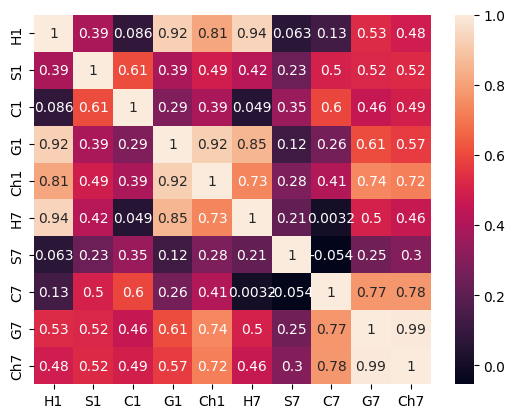

In [ ]:
pearsont = tex.corr(method='pearson')
sns.heatmap(pearsont,annot=True)

### Matriz de correlación de Spearman

<Axes: >

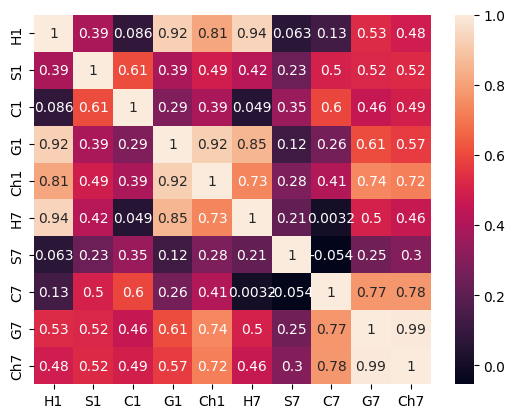

In [ ]:
spearmant = tex.corr(method='spearman')
sns.heatmap(pearsont,annot=True)

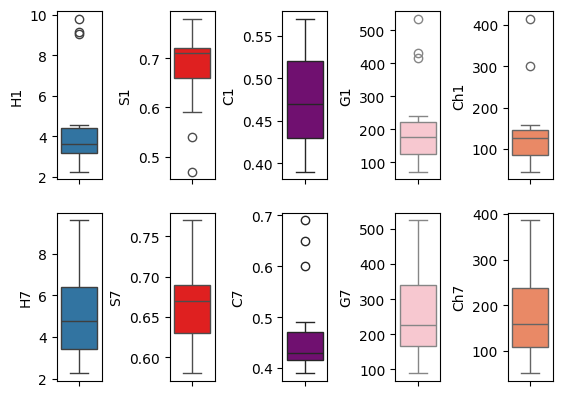

In [ ]:
plt.subplot(2,5,1)
sns.boxplot(tex['H1'])

plt.subplot(2,5,6)
sns.boxplot(tex['H7'])

plt.subplot(2,5,2)
sns.boxplot(tex['S1'],color='red')

plt.subplot(2,5,7)
sns.boxplot(tex['S7'],color='red')

plt.subplot(2,5,3)
sns.boxplot(tex['C1'],color='purple')

plt.subplot(2,5,8)
sns.boxplot(tex['C7'],color='purple')

plt.subplot(2,5,4)
sns.boxplot(tex['G1'],color='pink')

plt.subplot(2,5,9)
sns.boxplot(tex['G7'],color='pink')

plt.subplot(2,5,5)
sns.boxplot(tex['Ch1'],color='coral')

plt.subplot(2,5,10)
sns.boxplot(tex['Ch7'],color='coral')

plt.subplots_adjust(wspace=1.5)

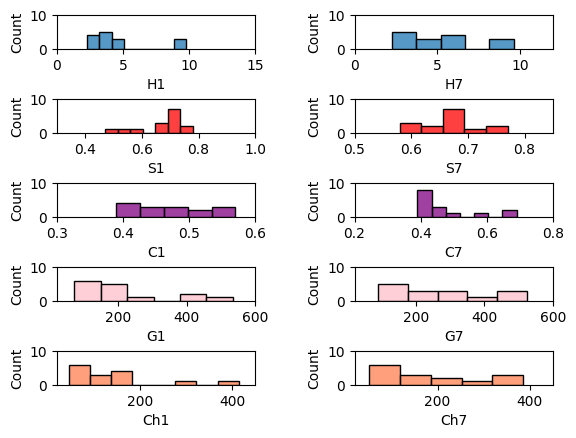

In [ ]:
plt.subplot(5,2,1)
sns.histplot(tex['H1'])
plt.xlim(0,15)
plt.ylim(0,10)

plt.subplot(5,2,2)
sns.histplot(tex['H7'])
plt.xlim(0,12)
plt.ylim(0,10)

plt.subplot(5,2,3)
sns.histplot(tex['S1'],color='red')
plt.xlim(0.3,1)
plt.ylim(0,10)

plt.subplot(5,2,4)
sns.histplot(tex['S7'],color='red')
plt.xlim(0.5,0.85)
plt.ylim(0,10)

plt.subplot(5,2,5)
sns.histplot(tex['C1'],color='purple')
plt.xlim(0.3,0.6)
plt.ylim(0,10)

plt.subplot(5,2,6)
sns.histplot(tex['C7'],color='purple')
plt.xlim(0.2,0.8)
plt.ylim(0,10)

plt.subplot(5,2,7)
sns.histplot(tex['G1'],color='pink')
plt.xlim(20,600)
plt.ylim(0,10)

plt.subplot(5,2,8)
sns.histplot(tex['G7'],color='pink')
plt.xlim(20,600)
plt.ylim(0,10)

plt.subplot(5,2,9)
sns.histplot(tex['Ch1'],color='coral')
plt.xlim(20,450)
plt.ylim(0,10)

plt.subplot(5,2,10)
sns.histplot(tex['Ch7'],color='coral')
plt.xlim(20,450)
plt.ylim(0,10)

plt.subplots_adjust(wspace=0.5,hspace=1.5)

#### Diagrama 3D

Text(0.5, 0.92, 'C-S-H day 1')

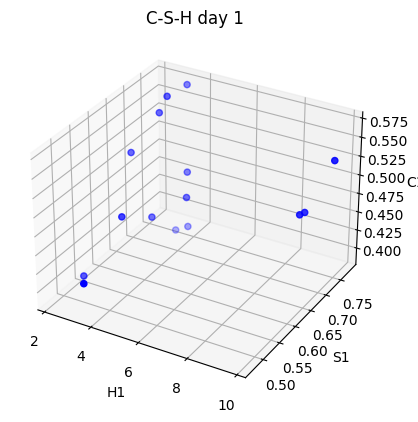

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tex['H1'], tex['S1'], tex['C1'], c='b', marker='o')
ax.set_xlabel('H1')
ax.set_ylabel('S1')
ax.set_zlabel('C1')
plt.title('C-S-H day 1')

Text(0.5, 0.92, 'C-G-Ch day 1')

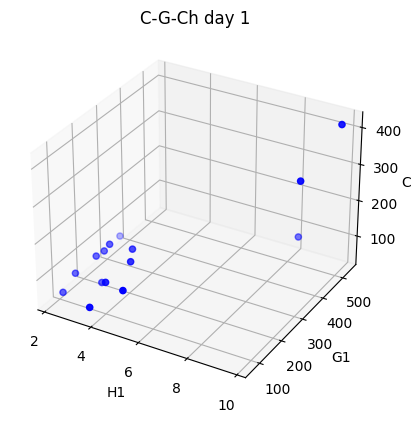

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tex['H1'], tex['G1'], tex['Ch1'], c='b', marker='o')
ax.set_xlabel('H1')
ax.set_ylabel('G1')
ax.set_zlabel('Ch1')
plt.title('C-G-Ch day 1')

Text(0.5, 0.92, 'C-S-H day 7')

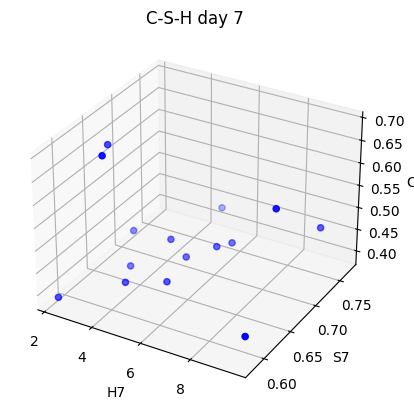

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tex['H7'], tex['S7'], tex['C7'], c='b', marker='o')
ax.set_xlabel('H7')
ax.set_ylabel('S7')
ax.set_zlabel('C7')
plt.title('C-S-H day 7')

Text(0.5, 0.92, 'C-G-Ch day 7')

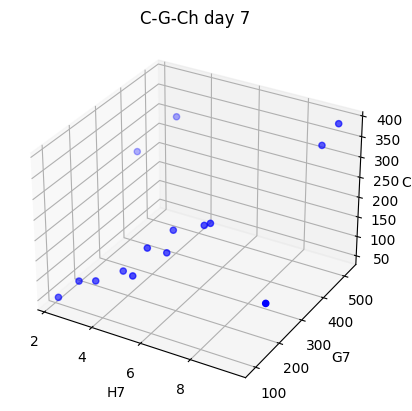

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tex['H7'], tex['G7'], tex['Ch7'], c='b', marker='o')
ax.set_xlabel('H7')
ax.set_ylabel('G7')
ax.set_zlabel('Ch7')
plt.title('C-G-Ch day 7')

**Con los coeficientes de variación univariados, calcule el coeficiente de variación multivariado tal como vimos en clase y compare resultados.
En los alimentos estas medidas suelen ser de utilidad en la toma de decisiones sobre la calidad de un producto. Use algún valor de referencia para juzgar sin entre fechas se evidencia cambio de importancia en cada propiedad.
Calcule cambios relativos y absolutos en las propiedades evaluadas. Presente los resultados de forma matricial y diseñe alguna representación gráfica que permita ver las propiedades donde se alcanzaron cambios de importancia.**


### Coeficientes de variación

In [20]:
# Datos originales
datos_originales = np.array([[0.38, 1.1, 81],
                             [0.4125, 10.255, 40.4125]])

# Coeficientes de variación univariados
cv_univariados = np.std(datos_originales, axis=0) / np.mean(datos_originales, axis=0)

# Matriz de covarianza
covariance_matrix = np.cov(datos_originales, rowvar=False)

# Coeficiente de variación multivariado
cv_multivariado = np.sqrt(np.sum(np.diag(covariance_matrix))) / np.mean(datos_originales)

print("Coeficientes de variación univariados:")
print(cv_univariados)
print("\nCoeficiente de variación multivariado:")
print(cv_multivariado)


Coeficientes de variación univariados:
[0.04100946 0.80625275 0.33429424]

Coeficiente de variación multivariado:
1.321686567894194


In [21]:
# Primer conjunto de datos (referencia)
datos_referencia = datos_originales[0]

# Segundo conjunto de datos
datos_nuevos = datos_originales[1]

# Cambios relativos y absolutos en las propiedades evaluadas
cambios_absolutos = datos_nuevos - datos_referencia
cambios_relativos = cambios_absolutos / datos_referencia

print("Cambios absolutos:")
print(cambios_absolutos)
print("\nCambios relativos:")
print(cambios_relativos)


Cambios absolutos:
[ 3.25000e-02  9.15500e+00 -4.05875e+01]

Cambios relativos:
[ 0.08552632  8.32272727 -0.50108025]


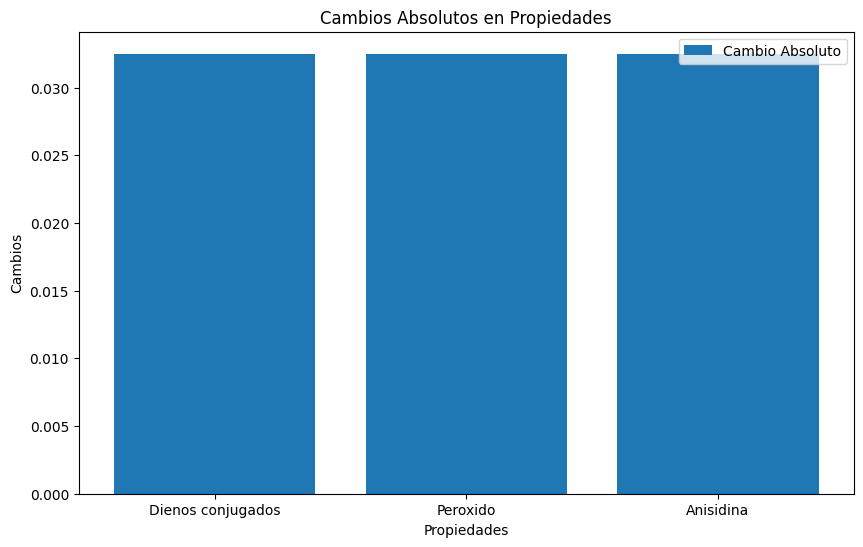

In [22]:
propiedades = ['Dienos conjugados', 'Peroxido', 'Anisidina']
plt.figure(figsize=(10, 6))
plt.bar(propiedades, cambios_absolutos[0], label='Cambio Absoluto')
plt.xlabel('Propiedades')
plt.ylabel('Cambios')
plt.title('Cambios Absolutos en Propiedades')
plt.legend()
plt.show()


## 3. Encuesta

In [24]:
encuesta = pd.read_excel(("/content/drive/MyDrive/Taller2/Punto3.xlsx"))
encuesta

,It5,It6
0,3,3
1,4,4
2,3,3
3,4,4
4,2,1
5,3,3
6,4,4
7,2,1
8,3,3
9,4,4


### Mediana y moda de IT5

In [25]:
medianaIT5=statistics.median(encuesta["It5"])
medianaIT5

3

In [26]:
modaIT5=statistics.mode(encuesta["It5"])
modaIT5

4

### Mediana y moda de IT6

In [27]:
medianaIT6=statistics.median(encuesta["It6"])
medianaIT6

3

In [28]:
modaIT6=statistics.mode(encuesta["It5"])
modaIT6

4

### Proporción de satisfacción en cada nivel

In [ ]:
PR_IT5=encuesta["It5"].value_counts(normalize=True)
PR_IT5

It5
4    0.371429
3    0.342857
2    0.257143
1    0.028571
Name: proportion, dtype: float64

Sabiendo que uno es totalmente insatisfecho, el 2,8% se encuentra en este nivel, mientras que el 25,7% esta insatisfecho, el 34,3% satisfecho y el 37,1% muy satisfecho.

### Proporción de categorias de calidad

In [ ]:
PR_IT6=encuesta["It6"].value_counts(normalize=True)
PR_IT6

It6
3    0.457143
4    0.285714
2    0.171429
1    0.085714
Name: proportion, dtype: float64

Teniendo en cuenta que entre las opciones la número uno es muy baja calidad, se presenta un 8,5% en esta categpría, mientras que el 17,1% considera que son de baja calidad, por otro lado el 28,6% considera que es normal y el 45,7% restante que son de buena calidad.

### Matriz de correlación de Spearman


In [ ]:
matriz_correlaciones_spearman = encuesta.corr(method='spearman')
matriz_correlaciones_spearman

,It5,It6
It5,1.000000,0.802345
It6,0.802345,1.000000


### Tabla de frencuencias

In [ ]:
for It5 in encuesta.columns:
    print(f"Tabla de frecuencia'{It5}':")
    print(encuesta[It5].value_counts())
    print()

Tabla de frecuencia'It5':
It5
4    13
3    12
2     9
1     1
Name: count, dtype: int64

Tabla de frecuencia'It6':
It6
3    16
4    10
2     6
1     3
Name: count, dtype: int64



Como se puede observar en la tabla de frecuencia, para la variable cinco el numero con mayor repetición es el cuatro, seguido del tres y por ultimo el uno, mientras que para la variable seis, el numero mas repetido es el tres, seguido del cuatro.

### Tabla de contigencia

In [ ]:
tabla_contingencia = pd.crosstab(encuesta['It5'], encuesta['It6'])
tabla_contingencia

It6,1,2,3,4
It5,,,,
1,1,0,0,0
2,2,6,1,0
3,0,0,10,2
4,0,0,5,8


### La razón de satisfechos respecto a insatifechos en cada nivel de calidad y de forma global

In [ ]:
encuesta['Satisfaccion'] = encuesta['It5'].replace({1: 0, 2: 0, 3: 2, 4: 2})
encuesta['Calidad'] = encuesta['It6'].replace({1: 0, 2: 2, 3: 3})

satisfaccion_media = encuesta.groupby('It5')['Satisfaccion'].mean()
calidad_media = encuesta.groupby('It6')['Calidad'].mean()


In [ ]:
# Razón de satisfechos respecto a insatisfechos en cada nivel de calidad
razon_satisfechos_insatisfechos_por_calidad = satisfaccion_media / calidad_media

# Razón de satisfechos respecto a insatisfechos de forma global
total_satisfechos = encuesta['Satisfaccion'].sum()
total_insatisfechos = encuesta['Calidad'].sum() - total_satisfechos
razon_global = total_satisfechos / total_insatisfechos


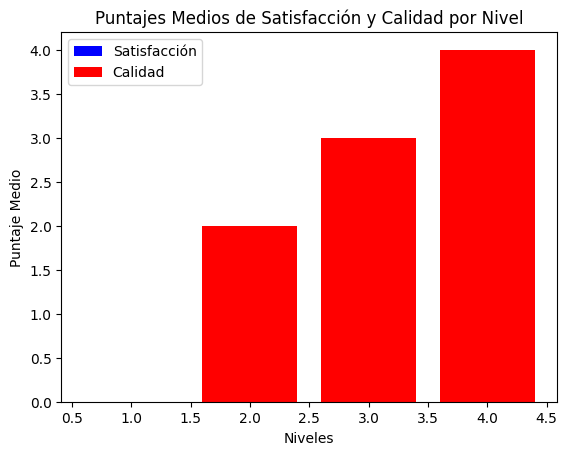

In [ ]:
# Diagrama
fig, ax = plt.subplots()
ax.bar(satisfaccion_media.index, satisfaccion_media, color='b', label='Satisfacción')
ax.bar(calidad_media.index, calidad_media, color='r', label='Calidad')

ax.set_xlabel('Niveles')
ax.set_ylabel('Puntaje Medio')
ax.set_title('Puntajes Medios de Satisfacción y Calidad por Nivel')
ax.legend()

plt.show()

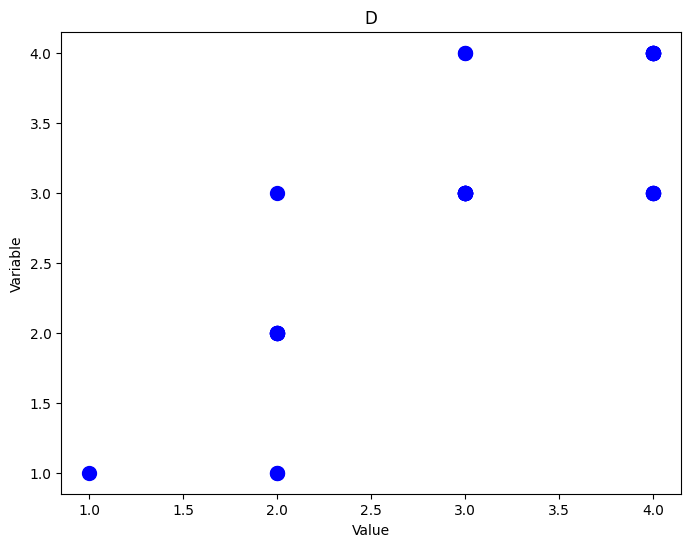

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(encuesta['It5'], encuesta['It6'], s=100, color='blue')
ax.set_xlabel('Value')
ax.set_ylabel('Variable')
ax.set_title('D')


plt.show()

In [33]:
contingency_table = pd.crosstab(encuesta['It5'], encuesta['It6'])

c, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
phi = np.sqrt(c / (n * min(contingency_table.shape) - 1))

print("Valor de Chi-cuadrado:", c)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Valores esperados:", expected)
print("Coeficiente Phi:", phi)


Valor de Chi-cuadrado: 46.261574074074076
Valor p: 5.384815903809002e-07
Grados de libertad: 9
Valores esperados: [[0.08571429 0.17142857 0.45714286 0.28571429]
 [0.77142857 1.54285714 4.11428571 2.57142857]
 [1.02857143 2.05714286 5.48571429 3.42857143]
 [1.11428571 2.22857143 5.94285714 3.71428571]]
Coeficiente Phi: 0.5769030071594338
